In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
import sys

In [87]:
%run /scratch/jho5ze/bionets/covid/scripts/entropy_utils.py

In [95]:
def plot_edge_weights(G, thresh=1, seed=7):
    fig, ax = plt.subplots(figsize=(8,6))
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > thresh]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= thresh]
    
    pos = nx.spring_layout(G, seed=seed)
    
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=600, ax=ax)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4, ax=ax)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=1, style="dashed", ax=ax)

    # labels
    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", ax=ax)

In [133]:
def report_entropy(graph, genomes):
    presence_info = get_genome_node_presence(graph, genomes)
    for seqs in range(2):
        seq_name = f"_sequences_{seqs}"
        for genomes in range(2):
            seq_str = " sequences" if seqs else ""
            genomes_str = " genomes" if genomes else ""
            label_str = f"Weighted by{seq_str.upper()}{genomes_str.upper()}: "
            entropy = calc_uncertainty(graph, presence_info, weigh_on_sequence=seqs, weigh_on_genomes=genomes)
            print(f"{label_str}\n\t{entropy}")
            
def get_example_graphs(msa):
    #Build graph from string MSA
    two_seq_graph, two_seq_genomes = generate_nx_from_msa(msa)
    #Add a root, if none exists
    add_root(two_seq_graph, two_seq_genomes)
    #Collapse the graph (combine all edges between nodes with parent out and child in degree 1)
    collapsed_two_graph = collapse_graph(two_seq_graph)
    #Add feature "sequence_len" to graph
    annotate_graph(two_seq_graph)
    annotate_graph(collapsed_two_graph)
    return two_seq_graph, collapsed_two_graph, two_seq_genomes

### Full graph

In [211]:
bottom_seq = "GTCACC"
top_seq = "ATCAAC"

single_msa = f"""
>top_seq0
{top_seq}
"""

two_msa = f"""
>bottom_seq0
{bottom_seq}
>top_seq0
{top_seq}
"""

many_msa = "\n".join([f">bottom_seq0\n{bottom_seq}"] + \
                     [f">top_seq{ix}\n{top_seq}" for ix in range(10)])
# print("Two: \n", two_msa)
# print("Many: \n", many_msa)

#### Single seq

In [212]:
single_full, single_collapsed, single_genomes = get_example_graphs(single_msa)
print("Full")
report_entropy(single_full, single_genomes)

Full
Weighted by: 
	2.584962500721156
Weighted by GENOMES: 
	2.584962500721156
Weighted by SEQUENCES: 
	2.584962500721156
Weighted by SEQUENCES GENOMES: 
	2.584962500721156


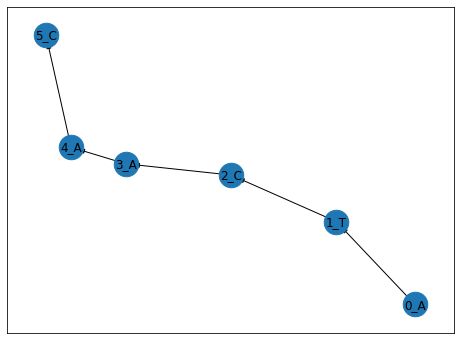

In [213]:
plot_edge_weights(single_full, seed=21)

#### Two seqs

In [215]:
two_full, two_collapsed, two_genomes = get_example_graphs(two_msa)
print("Full")
report_entropy(two_full, two_genomes)

Full
Weighted by: 
	3.6143694458867555
Weighted by GENOMES: 
	3.378783493486176
Weighted by SEQUENCES: 
	3.6143694458867555
Weighted by SEQUENCES GENOMES: 
	3.378783493486176


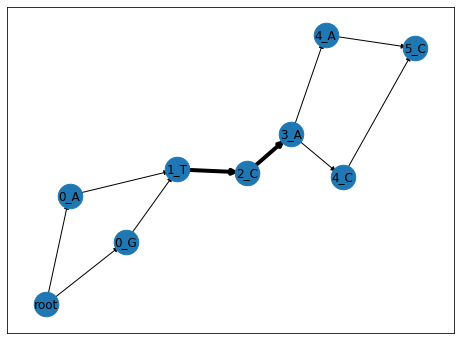

In [216]:
plot_edge_weights(two_full, seed=21)

#### Many seqs

In [217]:
many_full, many_collapsed, many_genomes = get_example_graphs(many_msa)
print("Full")
report_entropy(many_full, many_genomes)

Full
Weighted by: 
	3.6143694458867555
Weighted by GENOMES: 
	3.2186397754637515
Weighted by SEQUENCES: 
	3.6143694458867555
Weighted by SEQUENCES GENOMES: 
	3.2186397754637515


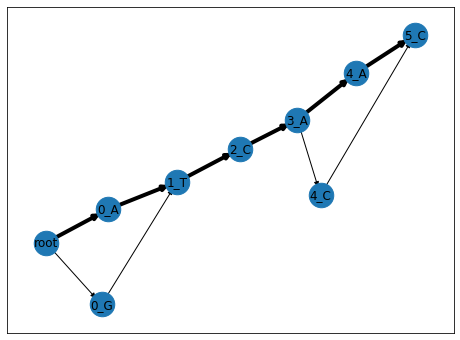

In [218]:
plot_edge_weights(many_full, seed=21)

### Collapsed graph

In [224]:
bottom_seq = "GGGTTTCCCAAACCCCCC"
top_seq = "AAATTTCCCAAAAAACCC"

single_msa = f"""
>top_seq0
{top_seq}
"""

two_msa = f"""
>bottom_seq0
{bottom_seq}
>top_seq0
{top_seq}
"""

many_msa = "\n".join([f">bottom_seq0\n{bottom_seq}"] + \
                     [f">top_seq{ix}\n{top_seq}" for ix in range(10)])
# print("Two: \n", two_msa)
# print("Many: \n", many_msa)

#### Single seq

In [225]:
single_full, single_collapsed, single_genomes = get_example_graphs(single_msa)

In [226]:
print("Full")
report_entropy(single_full, single_genomes)

Full
Weighted by: 
	4.169925001442313
Weighted by GENOMES: 
	4.169925001442313
Weighted by SEQUENCES: 
	4.169925001442313
Weighted by SEQUENCES GENOMES: 
	4.169925001442313


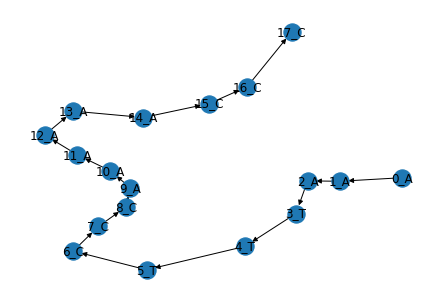

In [227]:
nx.draw_spring(single_full, with_labels=True)

In [230]:
print("Collapsed")
report_entropy(single_collapsed, two_genomes)

Collapsed
Weighted by: 
	0.0
Weighted by GENOMES: 
	0.0
Weighted by SEQUENCES: 
	0.0
Weighted by SEQUENCES GENOMES: 
	0.0


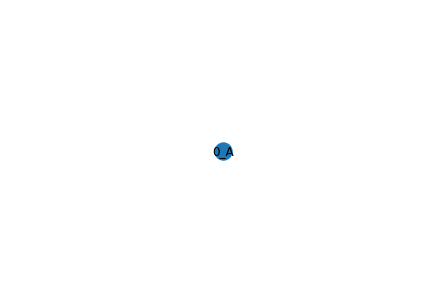

In [229]:
nx.draw_spring(single_collapsed, with_labels=True)

#### Two seqs

In [137]:
two_full, two_collapsed, two_genomes = get_example_graphs(two_msa)

In [138]:
print("Full")
report_entropy(two_full, two_genomes)

Full
Weighted by: 
	5.884638190120872
Weighted by GENOMES: 
	5.380020934723953
Weighted by SEQUENCES: 
	5.884638190120872
Weighted by SEQUENCES GENOMES: 
	5.380020934723953


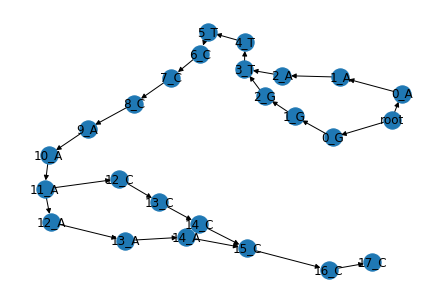

In [51]:
#nx.draw_spring(two_seq_graph, with_labels=True)

In [139]:
print("Collapsed")
report_entropy(two_collapsed, two_genomes)

Collapsed
Weighted by: 
	3.3787834934861762
Weighted by GENOMES: 
	3.121928094887362
Weighted by SEQUENCES: 
	3.031705688822799
Weighted by SEQUENCES GENOMES: 
	2.627191328208259


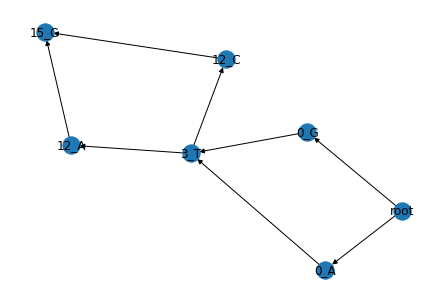

In [61]:
nx.draw_spring(collapsed_two_graph, with_labels=True)

### Many seqs

In [140]:
many_full, many_collapsed, many_genomes = get_example_graphs(many_msa)

In [141]:
print("Full")
report_entropy(many_full, many_genomes)

Full
Weighted by: 
	5.884638190120872
Weighted by GENOMES: 
	5.2030199832254835
Weighted by SEQUENCES: 
	5.884638190120872
Weighted by SEQUENCES GENOMES: 
	5.2030199832254835


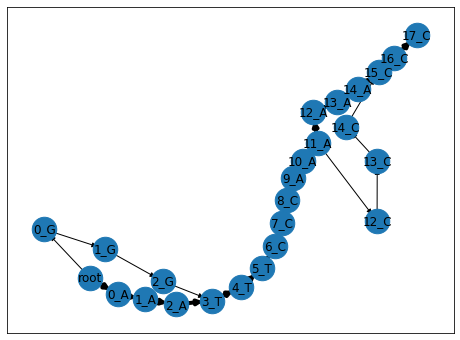

In [198]:
plot_edge_weights(many_full, seed=21)

In [199]:
print("Collapsed")
report_entropy(many_collapsed, many_genomes)

Collapsed
Weighted by: 
	3.3787834934861762
Weighted by GENOMES: 
	2.8977268896559676
Weighted by SEQUENCES: 
	3.031705688822799
Weighted by SEQUENCES GENOMES: 
	2.4501903767097892


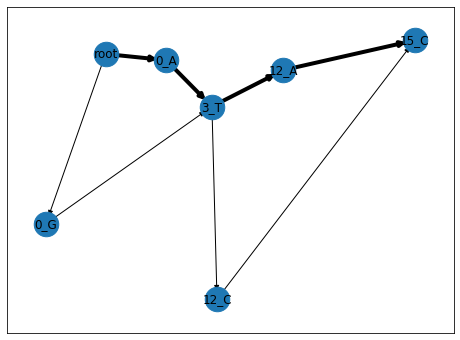

In [207]:
plot_edge_weights(many_collapsed, seed=15)